# Boosting

## importing important libraries

In [7]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, mean_absolute_error
import seaborn as sns

## Loading MNIST dataset

In [10]:
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']
x = np.array(x)
y = np.array(y)
x.shape

(70000, 784)

In [14]:
y = y.astype('int')
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

x_train.shape

(60000, 784)

In [15]:
x_test.shape

(10000, 784)

In [16]:
y_train.shape

(60000,)

In [17]:
y_test.shape

(10000,)

## Data Visualisation

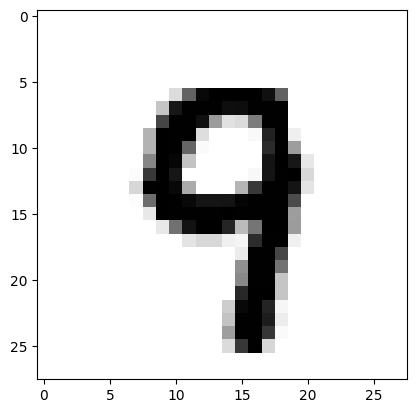

In [18]:
some_image = x[520]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

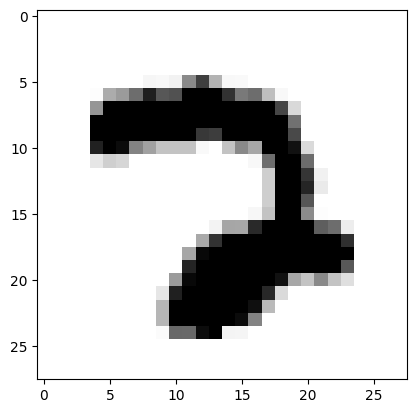

In [20]:
some_image = x[120]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary, interpolation='nearest')

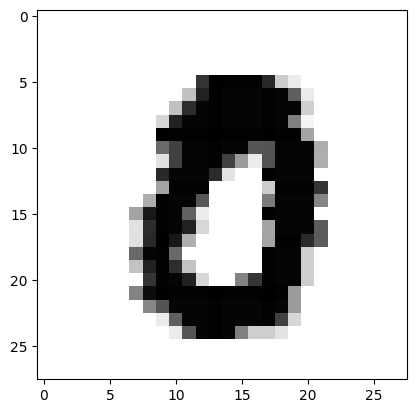

In [21]:
some_image = x[69]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

# Applying DecisionTreeRegressor as base model

## Assumption depth size 1

In [22]:
lr = 0.1 #learning rate
dt = DecisionTreeRegressor(max_depth = 1)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [24]:
y_pred = dt.predict(x_test)
y_pred[:10]

array([5.36713732, 2.6254691 , 2.6254691 , 2.6254691 , 5.36713732,
       2.6254691 , 5.36713732, 5.36713732, 2.6254691 , 5.36713732])

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.2267110373114707

In [26]:
score = r2_score(y_test, y_pred)
score

0.22100481734722877

In [27]:
y_pred = np.round(y_pred)
print(accuracy_score(y_test, y_pred)) #Akurasi dari data

0.0716


## Iteration 1

In [28]:
y_it1 = dt.predict(x_train)
y_it1 = np.round(y_it1)
y_train1 = y_train - y_it1
dt1= DecisionTreeRegressor(max_depth = 1)
dt1.fit(x_train,y_train1)

DecisionTreeRegressor(max_depth=1)

In [31]:
y_pred1 = dt1.predict(x_test)
y_pred1 = np.round(y_pred1)
print(accuracy_score(y_test, y_pred + y_pred1))

0.1238


## Iteration 2

In [32]:
y_it2 = dt1.predict(x_train)
y_it2 = np.round(y_it2)
y_train2 = y_train1 - y_it2
dt2= DecisionTreeRegressor(max_depth = 1)
dt2.fit(x_train,y_train2)

DecisionTreeRegressor(max_depth=1)

In [33]:
y_pred2 = dt2.predict(x_test)
y_pred2 = np.round(y_pred2)
print(accuracy_score(y_test, y_pred + y_pred1 + y_pred2))

0.1371


## Iteration 3

In [34]:
y_it3 = dt2.predict(x_train)
y_it3 = np.round(y_it3)
y_train3 = y_train2 - y_it3
dt3= DecisionTreeRegressor(max_depth = 1)
dt3.fit(x_train,y_train3)

DecisionTreeRegressor(max_depth=1)

In [35]:
y_pred3 = dt3.predict(x_test)
y_pred3 = np.round(y_pred3)
print(accuracy_score(y_test, y_pred + y_pred1 + y_pred2 + y_pred3))

0.1934


## Iteration 4

In [36]:
y_it4 = dt3.predict(x_train)
y_it4 = np.round(y_it4)
y_train4 = y_train3 - y_it4
dt4= DecisionTreeRegressor(max_depth = 1)
dt4.fit(x_train,y_train4)

DecisionTreeRegressor(max_depth=1)

In [37]:
y_pred4 = dt4.predict(x_test)
y_pred4 = np.round(y_pred4)
print(accuracy_score(y_test, y_pred + y_pred1 + y_pred2 + y_pred3 + y_pred4))

0.1447


## Iteration 5

In [38]:
y_it5 = dt4.predict(x_train)
y_it5 = np.round(y_it5)
y_train5 = y_train4 - y_it5
dt5= DecisionTreeRegressor(max_depth = 1)
dt5.fit(x_train,y_train5)

DecisionTreeRegressor(max_depth=1)

In [39]:
y_pred5 =  dt5.predict(x_test)
y_pred5 = np.round(y_pred5)
print(accuracy_score(y_test, y_pred + y_pred1 + y_pred2 + y_pred3 + y_pred4 + y_pred5))

0.1635
